In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("database.csv")
data.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [21]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [22]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,1/2/1965,13:44:18,19.246,145.616,131.6,6.0
1,1/4/1965,11:29:49,1.863,127.352,80.0,5.8
2,1/5/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,1/8/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,1/9/1965,13:32:50,11.938,126.427,15.0,5.8


In [1]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')

NameError: name 'data' is not defined

In [ ]:
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values

In [24]:
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

AttributeError: 'DataFrame' object has no attribute 'Timestamp'

In [25]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')

OverflowError: mktime argument out of range

In [26]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')

In [27]:
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values


In [28]:
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()


,Latitude,Longitude,Depth,Magnitude,Timestamp


In [29]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [30]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)


KeyError: 'PROJ_LIB'

In [1]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)


NameError: name 'data' is not defined

In [2]:
from mpl_toolkits.basemap import Basemap
import pandas as pd

data = pd.read_csv('database.csv')

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)


In [3]:

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()


NameError: name 'plt' is not defined

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

<Figure size 1200x1000 with 1 Axes>

RuntimeError: Can not put single artist in more than one figure

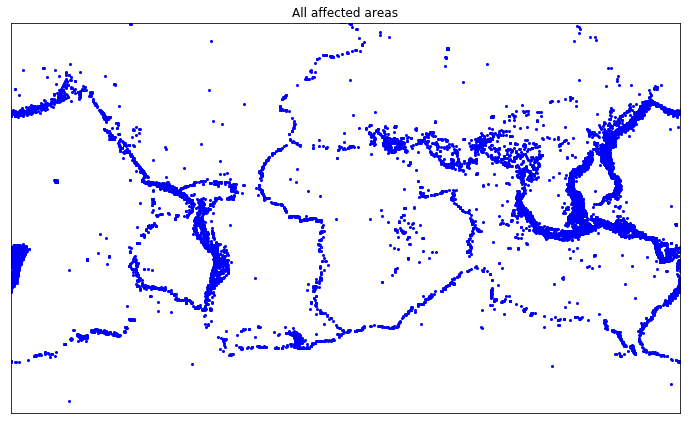

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='red')
m.drawmapboundary()
m.drawcountries()
print(plt.show())

RuntimeError: Can not put single artist in more than one figure

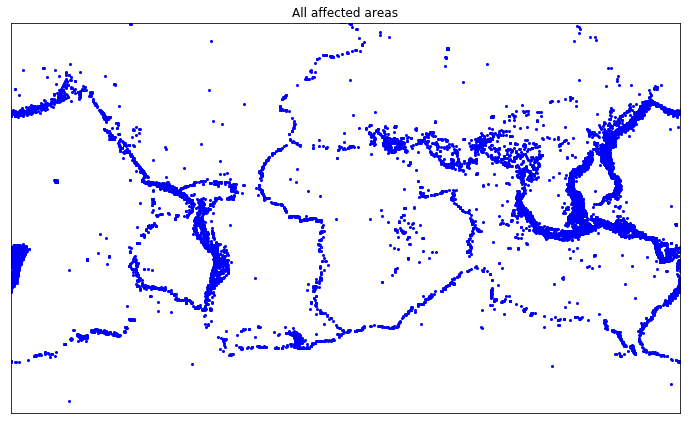

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='red')
m.drawmapboundary()
m.drawcountries()
print(plt.show())

RuntimeError: Can not put single artist in more than one figure

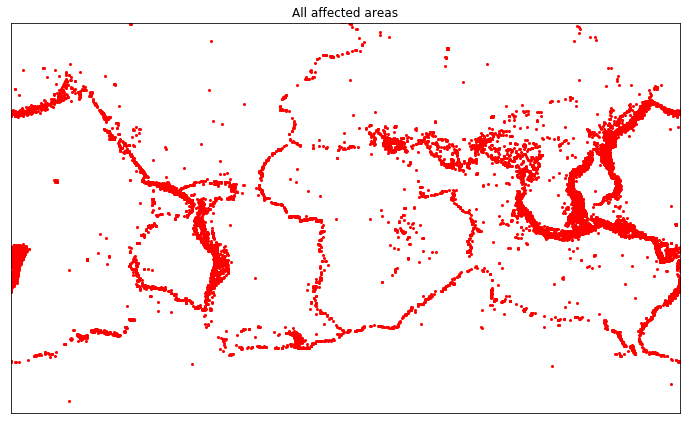

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'red')
m.drawcoastlines()
m.fillcontinents(color='green',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
print(plt.show())

RuntimeError: Can not put single artist in more than one figure

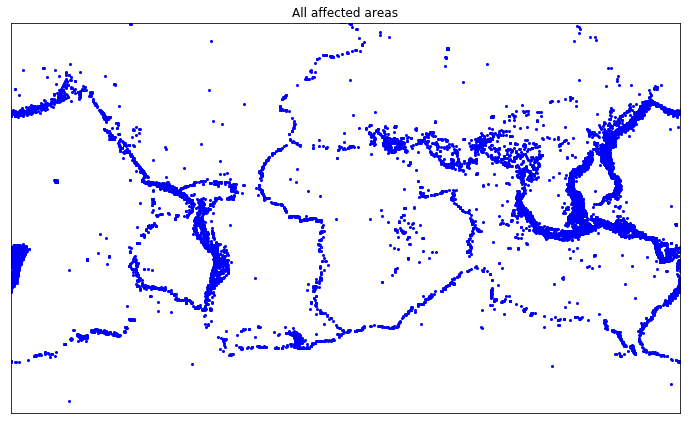

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='green',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

RuntimeError: Can not put single artist in more than one figure

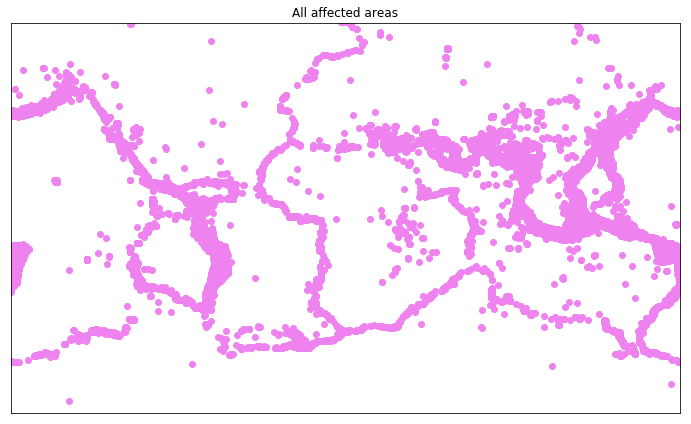

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 6, color = 'violet')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

RuntimeError: Can not put single artist in more than one figure

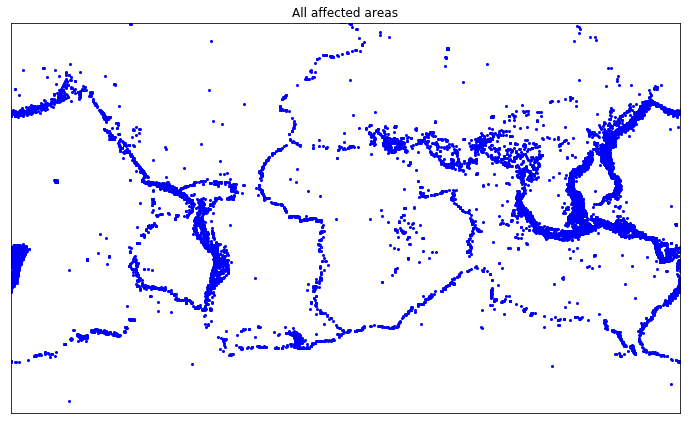

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.fillcontinents(color='lightgreen')
m.drawcoastlines(color='red')
#m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

RuntimeError: Can not put single artist in more than one figure

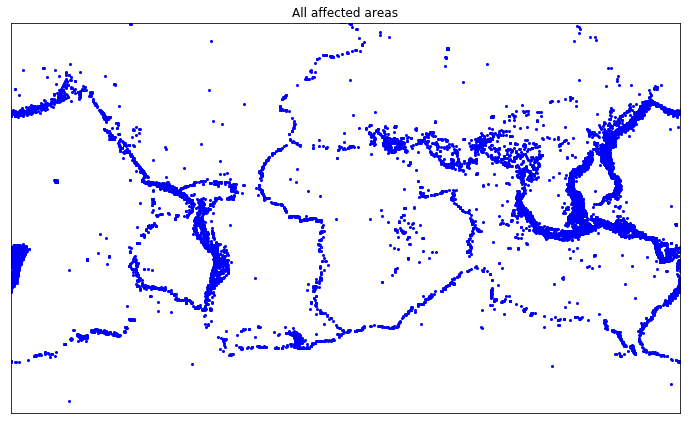

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.fillcontinents(color='lightgreen')
m.drawcoastlines(color='red')
#m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

RuntimeError: Can not put single artist in more than one figure

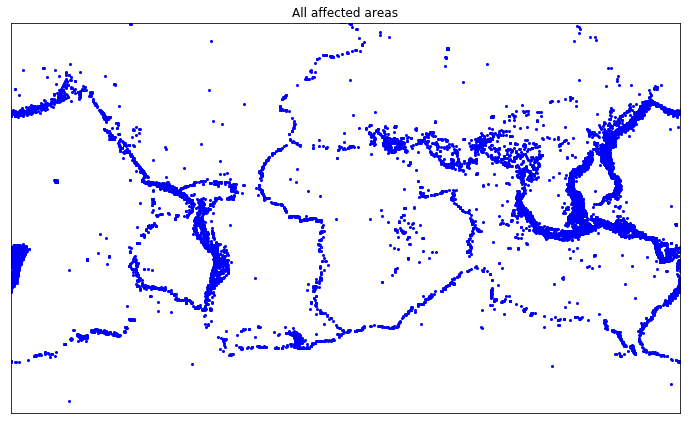

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.fillcontinents(color='0.8')
m.drawcoastlines(color='0.8')
#m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

RuntimeError: Can not put single artist in more than one figure

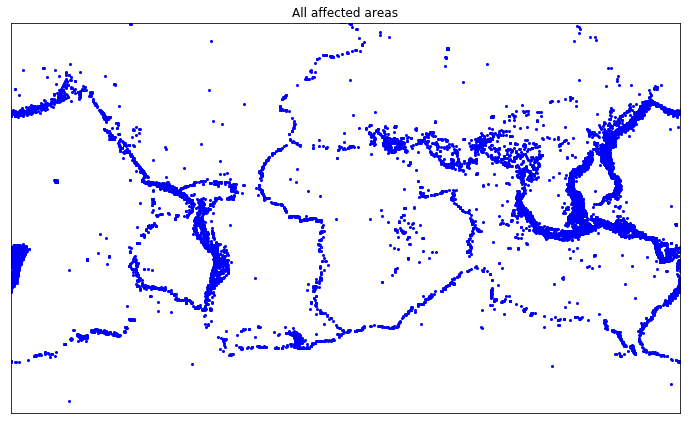

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.fillcontinents()
m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

RuntimeError: Can not put single artist in more than one figure

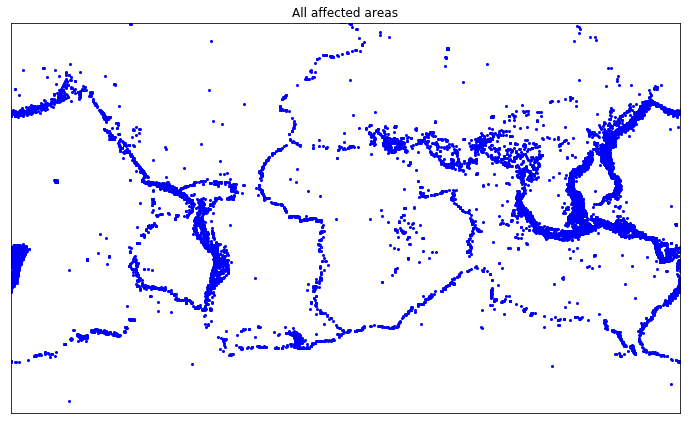

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
#m.fillcontinents(color='lightgreen')
m.drawcoastlines(color='red')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
print(plt.show())

In [1]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

NameError: name 'data' is not defined

In [2]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
print(plt.show())

NameError: name 'data' is not defined

In [3]:
from mpl_toolkits.basemap import Basemap
import pandas as pd

data = pd.read_csv('database.csv')

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
print(plt.show())

NameError: name 'plt' is not defined

In [4]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.pypolt as plt

data = pd.read_csv('database.csv')

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
print(plt.show())


ModuleNotFoundError: No module named 'matplotlib.pypolt'

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10)
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
#m.fillcontinents(color='lightgreen')
m.drawcoastlines(color='red')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
print(plt.show())

<Figure size 1200x1200 with 1 Axes>

None


In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10)
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
#m.fillcontinents(color='lightgreen')
m.drawcoastlines(color='red')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
print(plt.show())

SyntaxError: invalid syntax (<ipython-input-6-ee7aa8e9c378>, line 4)

In [7]:
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
data = pd.read_csv('database.csv')
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
print(plt.show())

SyntaxError: invalid syntax (<ipython-input-7-132d702ee763>, line 12)

In [ ]:
import pandas as pd
data = pd.read_csv('database.csv')
X = data[['Timestamp', 'Latitude', 'Longitude']]
y = data[['Magnitude', 'Depth']]
print(x)

In [8]:
import pandas as pd
data = pd.read_csv('database.csv')
X = data[['Timestamp', 'Latitude', 'Longitude']]
y = data[['Magnitude', 'Depth']]
print(X)

KeyError: "['Timestamp'] not in index"

In [5]:
import pandas as pd
data = pd.read_csv('database.csv')
X = data[['Latitude', 'Longitude']]
y = data[['Magnitude', 'Depth']]
print(x)

NameError: name 'x' is not defined